In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import get_data

In [2]:
features_place = [
    ("admin", "data/KRA_ADMIN_100m.tif"),
    ("landcover", "data/KRA_LANDCOVER_100m.tif"),
    #("prec", "data/KRA_PREC_100m.tif"),
    ("relief_aspect", "data/KRA_RELIEF_ASPECT_100m.tif"),
    ("relief_height", "data/KRA_RELIEF_HEIGHT_100m.tif"),
    ("relief_slope", "data/KRA_RELIEF_SLOPE_100m.tif"),
    ("relief_soiltexture", "data/KRA_SOILTEXTURE_100m.tif"),
    ("sunny_days", "data/KRA_SUNNY_DAYS_APR_OCT_100m.tif"),
    # ("tavg", "data/KRA_TAVG_100m.tif"),
    # ("tmax", "data/KRA_TMAX_100m.tif"),
    # ("tmin", "data/KRA_TMIN_100m.tif"),
    ("vineyard", "data/KRA_VINEYARDS_100m.tif"),
    ("water_seasonality", "data/KRA_WATER_SEASONALYTY_100m.tif")
]

In [3]:
coords = get_data.correct_indexes()

In [4]:
len(coords)

14642963

In [5]:
x, y = coords.T

In [6]:
N = 401

In [7]:
x_grid = np.quantile(x, np.linspace(0.1, 0.9, N))

In [8]:
centroids = []
for i in range(1, len(x_grid)):
    tmp = coords[(x >= x_grid[i - 1]) & (x < x_grid[i])]
    y_tmp = tmp.T[1]
    y_grid = np.quantile(y_tmp, np.linspace(0.1, 0.9, N))
    for j in range(1, len(y_grid)):
        x_p, y_p = np.mean(tmp[y_tmp[(y_tmp >= y_grid[j - 1]) & (y_tmp < y_grid[j])]], axis=0)
        centroids.append([int(x_p), int(y_p)])
    x_p, y_p = np.mean(tmp[y_tmp[(y_tmp >= y_grid[-1])]], axis=0)
    centroids.append([int(x_p), int(y_p)])

tmp = coords[(x >= x_grid[-1])]
y_tmp = tmp.T[1]
y_grid = np.quantile(y_tmp, np.linspace(0.1, 0.9, N))
for j in range(1, len(y_grid)):
    x_p, y_p = np.mean(tmp[y_tmp[(y_tmp >= y_grid[j - 1]) & (y_tmp < y_grid[j])]], axis=0)
    centroids.append([int(x_p), int(y_p)])
x_p, y_p = np.mean(tmp[y_tmp[(y_tmp >= y_grid[-1])]], axis=0)
centroids.append([int(x_p), int(y_p)])

In [9]:
centroids = np.array(centroids).T

In [10]:
tmp = get_data.get_data_df(centroids, features_place)

In [11]:
x_plot = tmp["x"]
y_plot = tmp["y"]

In [12]:
import matplotlib.pyplot as plt

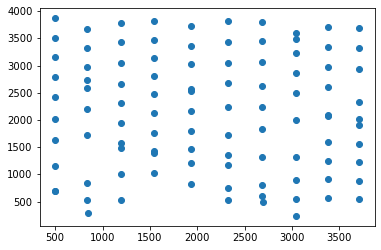

In [13]:
plt.scatter(x_plot, y_plot)

In [11]:
tmp

,x,y,admin,landcover,relief_aspect,relief_height,relief_slope,relief_soiltexture,sunny_days,vineyard,water_seasonality
0,497,651,False,0,-99999.000000,0,0.000000,0,147,False,12
1,497,658,False,0,-99999.000000,0,0.000000,0,147,False,12
2,497,666,False,0,-99999.000000,0,0.000000,0,147,False,12
3,497,673,False,0,-99999.000000,0,0.000000,0,146,False,12
4,497,681,False,0,-99999.000000,0,0.000000,0,146,False,12
...,...,...,...,...,...,...,...,...,...,...,...
160796,3711,3846,False,2,196.313858,1221,23.132183,9,60,False,0
160797,3711,3855,False,2,163.141602,1247,19.025156,9,60,False,0
160798,3711,3865,False,2,347.275635,1198,9.028954,9,61,False,0
160799,3711,3874,False,2,347.106262,1258,23.061136,9,61,False,0


In [12]:
tmp.to_csv("lands.csv", index=False)